In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist
from sklearn.cluster import AgglomerativeClustering


import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_excel('info.xlsx',sheet_name=1)

df_original = df.copy()

In [3]:
ffff

NameError: name 'ffff' is not defined

In [4]:
df.columns

Index(['PUNTO_VENTA', 'COD_PUNTO_VENTA', 'CONTRIBUCION', 'ROTACION',
       'VENTA_POR_MES', 'MARGEN', 'VENTA_PESOS', 'VENTA_UNDS', 'INDICE',
       'CLUSTER', 'RANKING', 'CONCEPTO', 'DESPACHO', 'COSTO',
       'PARTICIPACIÓN %', 'MES_VENTA'],
      dtype='object')

In [5]:
df

,PUNTO_VENTA,COD_PUNTO_VENTA,CONTRIBUCION,ROTACION,VENTA_POR_MES,MARGEN,VENTA_PESOS,VENTA_UNDS,INDICE,CLUSTER,RANKING,CONCEPTO,DESPACHO,COSTO,PARTICIPACIÓN %,MES_VENTA
0,TIENDA ARKADIA,T093,1828644.00,0.854435,112.7,0.858769,2129378.00,1127,2.966199,grupo1,1,CUIDADO PERSONAL,1319,300733.926,0.053814,10
1,TIENDA VIVA ENVIGADO,T084,1820093.00,0.866409,89.5,0.846072,2151227.00,895,2.536614,grupo1,2,CUIDADO PERSONAL,1033,331133.668,0.030011,10
2,VENTURA PLAZA CUCUTA,FN66,1842979.00,0.855305,79.8,0.866880,2125992.00,798,2.250529,grupo1,3,CUIDADO PERSONAL,933,283012.121,0.023386,10
3,TIENDA SAN DIEGO,T024,1721450.00,0.840758,88.7,0.852838,2018496.00,887,2.208455,grupo1,4,CUIDADO PERSONAL,1055,297045.618,0.037486,10
4,TIENDA MAYORCA,T067,1778113.00,0.857143,82.2,0.861559,2063832.00,822,2.191551,grupo1,5,CUIDADO PERSONAL,959,285718.741,0.034712,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,OFFCORSS AGUACHICA,FN92,1100750.00,0.468000,11.7,0.854252,1288555.00,117,-2.601978,grupo4,81,CUIDADO PERSONAL,250,187804.845,0.025871,10
81,TIENDA OFFCORSS TULUA,FN41,516692.10,0.561947,25.4,0.865128,597243.70,127,-3.345622,grupo4,82,CUIDADO PERSONAL,226,80551.622,0.038723,5
82,OFFCORSS GRANADA,FN42,775278.60,0.403226,12.5,0.856972,904672.30,75,-3.523319,grupo4,83,CUIDADO PERSONAL,186,129393.712,0.011671,6
83,OFFCORSS VILLANUEVA,FN39,213384.20,0.272727,30.0,0.819437,260403.40,30,-4.742404,grupo4,84,CUIDADO PERSONAL,110,47019.164,0.031024,1


In [6]:
df =  df[['PUNTO_VENTA',  'CONTRIBUCION', 'ROTACION',
       'VENTA_POR_MES', 'MARGEN', 'VENTA_PESOS', 'VENTA_UNDS', 'COSTO']].set_index('PUNTO_VENTA')

In [7]:
df_result2.groupby('CLUSTER').agg(
    indice_min = ('RANKING', 'min'),
    indice_max = ('RANKING', 'max'),
)

NameError: name 'df_result2' is not defined

### PCA

In [8]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [9]:
df.columns

Index(['CONTRIBUCION', 'ROTACION', 'VENTA_POR_MES', 'MARGEN', 'VENTA_PESOS',
       'VENTA_UNDS', 'COSTO'],
      dtype='object')

In [49]:
variables_explicativas = ['CONTRIBUCION', 'ROTACION', 'VENTA_POR_MES', 'MARGEN', 'VENTA_PESOS', 'VENTA_UNDS']
# variables_explicativas = ['VENTA_PESOS', 'VENTA_UNDS', 'VENTA_POR_MES', 'COSTO', 'MARGEN', 'CONTRIBUCION']
X = df[variables_explicativas].dropna()

# Estandarización de los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicación de PCA
pca = PCA()
pca_result = pca.fit_transform(X_scaled)

# DataFrame con resultados de PCA
pca_df = pd.DataFrame(pca_result, columns=[f'z{i+1}' for i in range(pca_result.shape[1])])

In [50]:
pca_df

,z1,z2,z3,z4,z5,z6
0,-4.256885,2.167685,1.958596,-0.634667,-0.054238,-0.052228
1,-3.486483,0.826511,1.276921,-0.261422,-0.052662,0.009365
2,-2.814853,1.296928,0.427982,-0.125788,0.034295,-0.021800
3,-3.005221,1.139776,1.411622,-0.214266,-0.066722,-0.019432
4,-2.821156,1.214280,0.806263,-0.063254,-0.008979,-0.018506
...,...,...,...,...,...,...
80,3.150641,-1.113171,0.329016,-0.482761,-0.151348,-0.056337
81,4.234338,-0.025163,1.989367,1.101615,0.081837,0.024125
82,4.351412,-0.835323,1.189195,-0.311337,-0.090559,-0.053767
83,5.601706,-1.676459,4.047825,-0.424180,0.349041,-0.019440


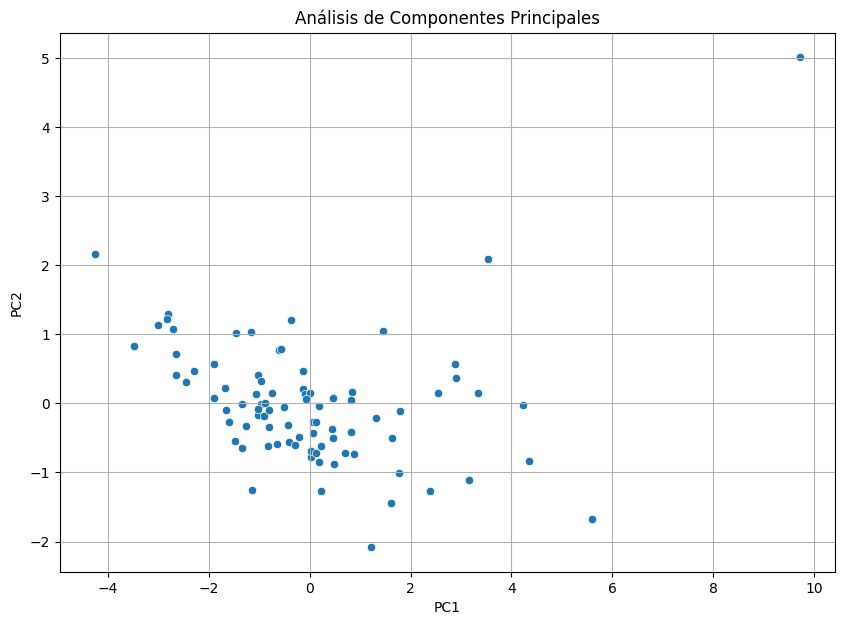

In [52]:
# Gráfico de biplot de PCA
plt.figure(figsize=(10, 7))
sns.scatterplot(x=pca_df['z1'], y=pca_df['z2'])
plt.title('Análisis de Componentes Principales')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.show()

In [53]:
# pca_df['PUNTO_VENTA'] = df.index

In [54]:
df_result = df.reset_index().merge(pca_df, right_index=True,left_index=True, how='left').rename(
    columns={'PC1': 'z1', 'PC2': 'z2', 'PC3': 'z3'}
)

In [55]:
df.reset_index().merge(pca_df, right_index=True,left_index=True, how='left')

,PUNTO_VENTA,CONTRIBUCION,ROTACION,VENTA_POR_MES,MARGEN,VENTA_PESOS,VENTA_UNDS,COSTO,z1,z2,z3,z4,z5,z6
0,TIENDA ARKADIA,1828644.00,0.854435,112.7,0.858769,2129378.00,1127,300733.926,-4.256885,2.167685,1.958596,-0.634667,-0.054238,-0.052228
1,TIENDA VIVA ENVIGADO,1820093.00,0.866409,89.5,0.846072,2151227.00,895,331133.668,-3.486483,0.826511,1.276921,-0.261422,-0.052662,0.009365
2,VENTURA PLAZA CUCUTA,1842979.00,0.855305,79.8,0.866880,2125992.00,798,283012.121,-2.814853,1.296928,0.427982,-0.125788,0.034295,-0.021800
3,TIENDA SAN DIEGO,1721450.00,0.840758,88.7,0.852838,2018496.00,887,297045.618,-3.005221,1.139776,1.411622,-0.214266,-0.066722,-0.019432
4,TIENDA MAYORCA,1778113.00,0.857143,82.2,0.861559,2063832.00,822,285718.741,-2.821156,1.214280,0.806263,-0.063254,-0.008979,-0.018506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,OFFCORSS AGUACHICA,1100750.00,0.468000,11.7,0.854252,1288555.00,117,187804.845,3.150641,-1.113171,0.329016,-0.482761,-0.151348,-0.056337
81,TIENDA OFFCORSS TULUA,516692.10,0.561947,25.4,0.865128,597243.70,127,80551.622,4.234338,-0.025163,1.989367,1.101615,0.081837,0.024125
82,OFFCORSS GRANADA,775278.60,0.403226,12.5,0.856972,904672.30,75,129393.712,4.351412,-0.835323,1.189195,-0.311337,-0.090559,-0.053767
83,OFFCORSS VILLANUEVA,213384.20,0.272727,30.0,0.819437,260403.40,30,47019.164,5.601706,-1.676459,4.047825,-0.424180,0.349041,-0.019440


In [60]:
len_pca_indices = len(pca.explained_variance_ratio_)
# len_pca_indices = 1
if(len_pca_indices >=3):
    df_result['Indice'] = df_result['z1'] * pca.explained_variance_ratio_[0] + \
                        df_result['z2'] * pca.explained_variance_ratio_[1] + \
                        df_result['z3'] * pca.explained_variance_ratio_[2]
elif(len_pca_indices == 2):
    df_result['Indice'] = df_result['z1'] * pca.explained_variance_ratio_[0] + \
                        df_result['z2'] * pca.explained_variance_ratio_[1]
else:
    df_result['Indice'] = df_result['z1'] * pca.explained_variance_ratio_[0]


In [57]:
len_pca_indices = len(pca.explained_variance_ratio_)

# Calcula el índice basado en la longitud de pca.explained_variance_ratio_
df_result['Indice'] = 0  # Inicializa la columna Indice

for i in range(len_pca_indices):
    df_result['Indice'] += df_result[f'z{i+1}'] * pca.explained_variance_ratio_[i]

In [61]:
df_result.head(2)[['Indice']]

,Indice
0,-2.619540
1,-2.314871


In [59]:
fff

NameError: name 'fff' is not defined

In [ ]:
df_result['Indice'] = df_result['z1'] * pca.explained_variance_ratio_[0] + \
                        df_result['z2'] * pca.explained_variance_ratio_[1] + \
                        df_result['z3'] * pca.explained_variance_ratio_[2]

In [ ]:
df_result['Indice2'] = df_result['z1'] * pca.explained_variance_ratio_[0] + \
                        df_result['z2'] * pca.explained_variance_ratio_[1] + \
                        df_result['z3'] * pca.explained_variance_ratio_[2] + \
                        df_result['PC4'] * pca.explained_variance_ratio_[3] + \
                        df_result['PC5'] * pca.explained_variance_ratio_[4] + \
                        df_result['PC6'] * pca.explained_variance_ratio_[5]

In [ ]:
df_result['Indice3'] = df_result['Indice']*(-1)

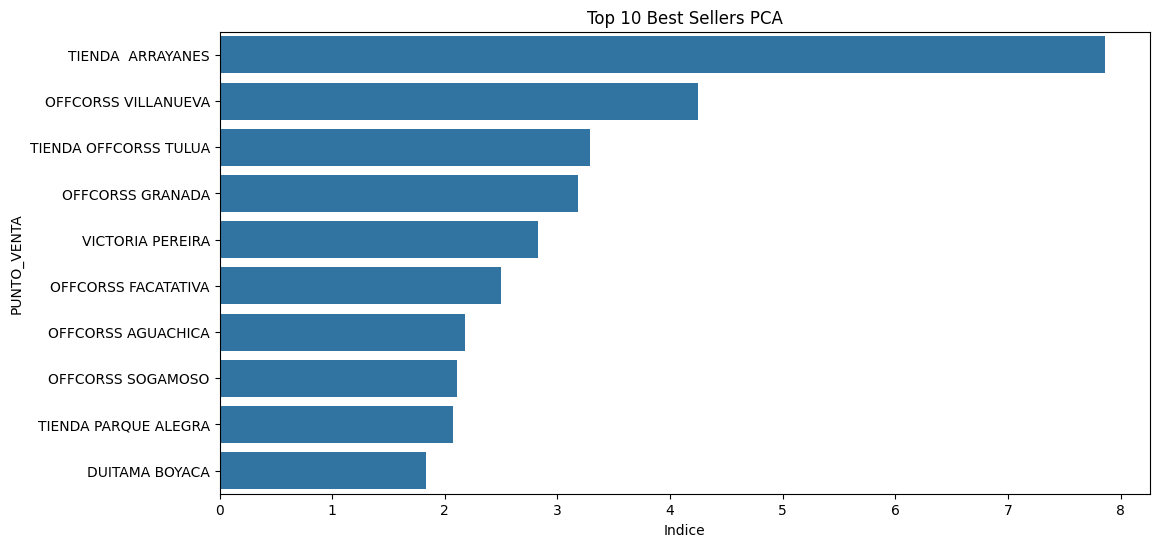

In [ ]:
top_n = 10
best_sellers = df_result.sort_values(by='Indice', ascending=False).head(top_n)

plt.figure(figsize=(12, 6))
sns.barplot(y='PUNTO_VENTA', x='Indice', data=best_sellers,
            )
plt.title(f'Top {top_n} Best Sellers PCA')
plt.show()

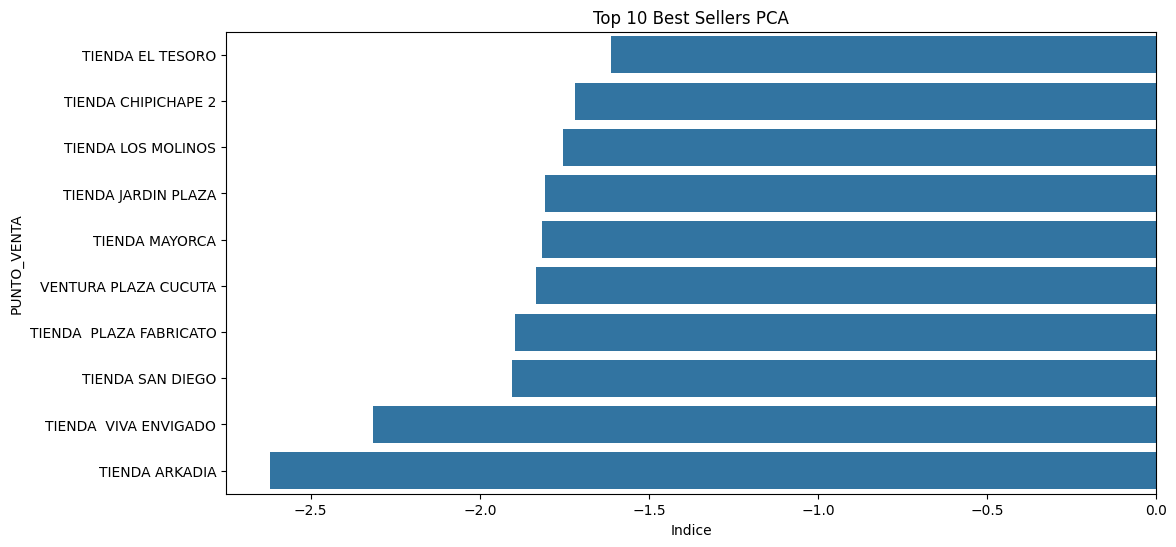

In [ ]:
top_n = 10
best_sellers = df_result.sort_values(by='Indice', ascending=False).tail(top_n)

plt.figure(figsize=(12, 6))
sns.barplot(y='PUNTO_VENTA', x='Indice', data=best_sellers,
            )
plt.title(f'Top {top_n} Best Sellers PCA')
plt.show()

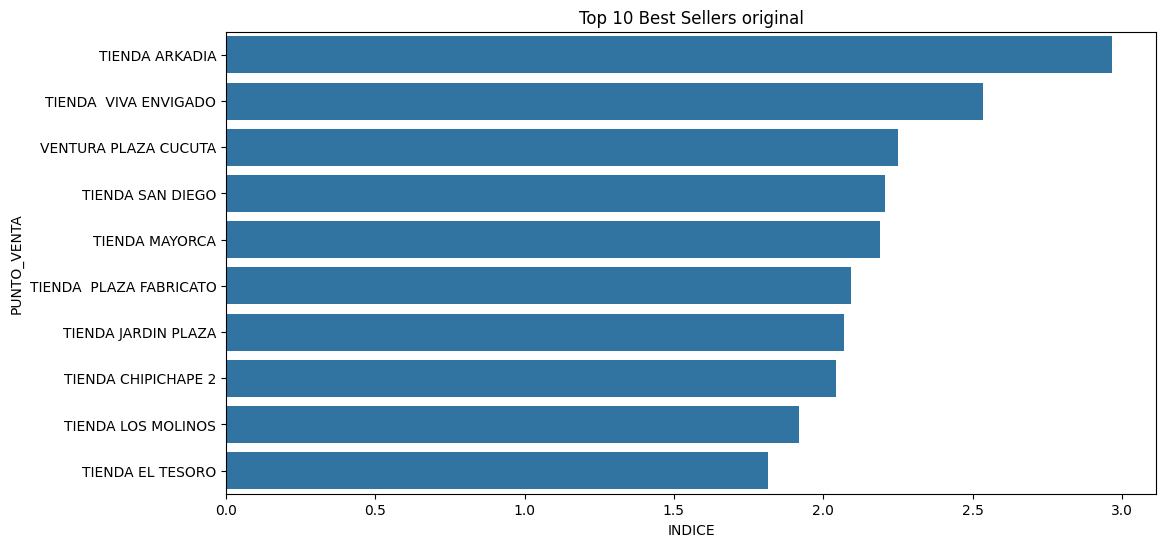

In [ ]:
top_n = 10
best_sellers = df_original.sort_values(by='INDICE', ascending=False).head(top_n)

plt.figure(figsize=(12, 6))
sns.barplot(y='PUNTO_VENTA', x='INDICE', data=best_sellers,
            )
plt.title(f'Top {top_n} Best Sellers original')
plt.show()

In [ ]:
df_result[df_result['PUNTO_VENTA'] == 'TIENDA EL TESORO']

,PUNTO_VENTA,CONTRIBUCION,ROTACION,VENTA_POR_MES,MARGEN,VENTA_PESOS,VENTA_UNDS,COSTO,z1,z2,z3,PC4,PC5,PC6,Indice,Indice2,Indice3
9,TIENDA EL TESORO,1871310.0,0.805556,66.7,0.858492,2179765.0,667,308454.86,-2.295697,0.474052,0.026329,-0.357738,0.042479,0.004964,-1.6115,-1.620528,1.6115


In [ ]:
df_original[df_original['PUNTO_VENTA'] == 'TIENDA EL TESORO']

,PUNTO_VENTA,COD_PUNTO_VENTA,CONTRIBUCION,ROTACION,VENTA_POR_MES,MARGEN,VENTA_PESOS,VENTA_UNDS,INDICE,CLUSTER,RANKING,CONCEPTO,DESPACHO,COSTO,PARTICIPACIÓN %,MES_VENTA
9,TIENDA EL TESORO,T014,1871310.0,0.805556,66.7,0.858492,2179765.0,667,1.815351,grupo1,10,CUIDADO PERSONAL,828,308454.86,0.025012,10


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CONTRIBUCION,85.0,1.527416e+06,328140.567513,19304.990000,1.480304e+06,1.598259e+06,1.704029e+06,1.951233e+06
ROTACION,85.0,7.135856e-01,0.133038,0.000000,6.812650e-01,7.466220e-01,7.922080e-01,8.664090e-01
VENTA_POR_MES,85.0,4.282609e+01,19.883720,2.000000,3.000000e+01,4.110000e+01,5.380000e+01,1.127000e+02
MARGEN,85.0,8.624386e-01,0.021558,0.819437,8.528380e-01,8.584920e-01,8.671090e-01,9.996930e-01
VENTA_PESOS,85.0,1.775328e+06,386617.800585,19310.920000,1.716101e+06,1.869782e+06,1.984050e+06,2.274714e+06
VENTA_UNDS,85.0,4.197412e+02,207.964807,2.000000,2.800000e+02,4.110000e+02,5.180000e+02,1.127000e+03
COSTO,85.0,2.479125e+05,63343.891216,5.931000,2.260049e+05,2.628090e+05,2.856853e+05,3.311337e+05


In [ ]:
df_result2 = df_result.merge(df_original[['PUNTO_VENTA','COD_PUNTO_VENTA', 'INDICE', 'CLUSTER', 'RANKING']], on='PUNTO_VENTA', how='left')

In [ ]:
df_result2 = df_result2.sort_values(by = 'Indice3', ascending=False)
df_result2['ranking_pca'] = range(1, len(df_result2) + 1)

In [ ]:
df_result2[df_result2['PUNTO_VENTA'].isin(['TIENDA EL TESORO', 'TIENDA JARDIN PLAZA', 'TIENDA SANTAFÉ MEDELLIN',
                                           'TIENDA CENTRO ANDINO', 'TIENDA  VIVA ENVIGADO'])][[
                                               'PUNTO_VENTA', 'Indice3',
                                           ]]

,PUNTO_VENTA,Indice3
1,TIENDA VIVA ENVIGADO,2.314871
6,TIENDA JARDIN PLAZA,1.806148
9,TIENDA EL TESORO,1.611500
14,TIENDA SANTAFÉ MEDELLIN,1.120088
21,TIENDA CENTRO ANDINO,0.673162


In [ ]:
import plotly.graph_objects as go

df_result2 = df_result2.sort_values(by='COD_PUNTO_VENTA', ascending=True)

fig = go.Figure()

fig.add_trace(go.Line(
    x = df_result2['COD_PUNTO_VENTA'], 
    y = [-1]*len(df_result2['COD_PUNTO_VENTA']),
    line_color='red',
    name='Línea -1'
    ))
            

fig.add_trace(go.Line(
    x = df_result2['COD_PUNTO_VENTA'], 
    y = [1]*len(df_result2['COD_PUNTO_VENTA']),
    line_color='green',
    name='Línea 1'
    ))

fig.add_trace(go.Line(
    x = df_result2['COD_PUNTO_VENTA'], 
    y = [0]*len(df_result2['COD_PUNTO_VENTA']),
    line_color='gray',
    name='Línea 0'
    ))

fig.add_trace(go.Scatter(
    x = df_result2['COD_PUNTO_VENTA'], 
    y = df_result2['Indice3'],
    mode='markers',
    marker=dict(color='purple'),
    name='Indice tiendas',
    ))

fig.show()

c:\Users\HELENAMM\AppData\Local\Programs\Python\Python312\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [ ]:
df_result2

,PUNTO_VENTA,CONTRIBUCION,ROTACION,VENTA_POR_MES,MARGEN,VENTA_PESOS,VENTA_UNDS,COSTO,z1,z2,z3,PC4,PC5,PC6,Indice,Indice2,Indice3,COD_PUNTO_VENTA,INDICE,CLUSTER,RANKING,ranking_pca
83,OFFCORSS VILLANUEVA,213384.20,0.272727,30.00000,0.819437,260403.40,30,47019.164,5.601706,-1.676459,4.047825,-0.424180,0.349041,-0.019440,4.245212,4.234758,-4.245212,FN39,-4.742404,grupo4,84,84
81,TIENDA OFFCORSS TULUA,516692.10,0.561947,25.40000,0.865128,597243.70,127,80551.622,4.234338,-0.025163,1.989367,1.101615,0.081837,0.024125,3.288997,3.316984,-3.288997,FN41,-3.345622,grupo4,82,83
82,OFFCORSS GRANADA,775278.60,0.403226,12.50000,0.856972,904672.30,75,129393.712,4.351412,-0.835323,1.189195,-0.311337,-0.090559,-0.053767,3.180941,3.172968,-3.180941,FN42,-3.523319,grupo4,83,82
79,OFFCORSS FACATATIVA,968795.00,0.544402,20.14286,0.879091,1102042.00,141,133247.012,3.337695,0.151902,0.358768,0.284336,0.060217,-0.004198,2.503238,2.510493,-2.503238,FN43,-2.549527,grupo4,80,80
40,TIENDA FUSAGASUGA,1620704.00,0.756705,39.50000,0.852598,1900899.00,395,280195.552,-0.404803,-0.565352,-0.220295,0.124966,-0.015830,0.020963,-0.400128,-0.396972,0.400128,FN44,0.249556,grupo2,41,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,TIENDA ARKADIA,1828644.00,0.854435,112.70000,0.858769,2129378.00,1127,300733.926,-4.256885,2.167685,1.958596,-0.634667,-0.054238,-0.052228,-2.619540,-2.635674,2.619540,T093,2.966199,grupo1,1,1
64,TIENDA PLAZA CLARO,1563639.00,0.650718,27.20000,0.858619,1821109.00,272,257470.221,0.700321,-0.717505,-0.582356,-0.274764,0.001253,-0.000278,0.353689,0.346728,-0.353689,T095,-0.600359,grupo3,65,63
68,TIENDA PASEO VILLA DEL RIO,1489062.00,0.632708,23.60000,0.873260,1705176.00,236,216114.089,1.308464,-0.209473,-0.796615,-0.143313,0.021601,-0.022825,0.853446,0.849830,-0.853446,T096,-0.965093,grupo3,69,69
5,TIENDA PLAZA FABRICATO,1951233.00,0.834988,67.30000,0.857792,2274714.00,673,323481.526,-2.644872,0.409627,-0.184390,-0.312242,0.068448,0.018995,-1.896838,-1.904689,1.896838,T097,2.093799,grupo1,6,4


In [ ]:
hh

NameError: name 'hh' is not defined

### Comparación con el original

In [ ]:
df_result2.groupby('CLUSTER').agg(
    indice_min = ('RANKING', 'min'),
    indice_max = ('RANKING', 'max'),
    mean_indice = ('RANKING', 'mean'),
    count = ('RANKING', 'nunique')
)

,indice_min,indice_max,mean_indice,count
CLUSTER,,,,
grupo1,1,26,13.5,26
grupo2,27,51,39.0,25
grupo3,52,71,61.5,20
grupo4,72,93,82.5,22


In [ ]:
df_result2['indices_dif_ranking_pca'] = np.where(df_result2['RANKING'] == df_result2['ranking_pca'], True, False)

In [ ]:
df_result2[(df_result2['Indice3'] > 0) & (df_result2['Indice3'] < 1)][['PUNTO_VENTA', 'CLUSTER','INDICE','Indice3','RANKING', 'ranking_pca']].sort_values(by='CLUSTER')


,PUNTO_VENTA,CLUSTER,INDICE,Indice3,RANKING,ranking_pca
23,TIENDA UNICENTRO GIRARDOT,grupo1,1.046825,0.884495,24,24
19,TIENDA OVIEDO 2,grupo1,1.140328,0.954102,20,22
24,LA ESTACION IBAGUE,grupo1,1.015080,0.817783,25,28
22,CAMPANARIO POPAYAN,grupo1,1.083439,0.928656,23,23
25,TIENDA COSMOCENTRO CALI,grupo1,1.004641,0.873322,26,25
18,UNICENTRO ARMENIA,grupo1,1.154613,0.961044,19,21
21,TIENDA GRAN PLAZA SOACHA,grupo1,1.094247,0.985109,22,20
48,TIENDA ECOPLAZA BOGOTA,grupo2,0.085809,0.266820,49,47
45,TIENDA NUESTRA URABA,grupo2,0.211635,0.230306,46,49
33,TIENDA PORTAL 80,grupo2,0.697739,0.637957,34,34


In [ ]:
def  diferencias_clusters_pca (df_result2, cluster):

    cluster1 = df_result2[df_result2['CLUSTER'] == cluster]

    cluster1.loc[:,'dentro del rango'] = np.where(
        (cluster1['ranking_pca'] >= cluster1['RANKING'].min()) & (cluster1['ranking_pca'] <= cluster1['RANKING'].max()), 
        True, 
        False
    )

    return cluster1


In [ ]:
df_result2[df_result2['Indice3'] > 1]

,PUNTO_VENTA,CONTRIBUCION,ROTACION,VENTA_POR_MES,MARGEN,VENTA_PESOS,VENTA_UNDS,COSTO,z1,z2,z3,PC4,PC5,PC6,Indice,Indice2,Indice3,COD_PUNTO_VENTA,INDICE,CLUSTER,RANKING,ranking_pca,indices_dif_ranking_pca
13,VENTURA PLAZA CUCUTA,7604244.0,0.717330,21.95652,0.679141,11196857.0,505,3.592613e+06,-1.791864,0.436155,0.252543,-0.166662,-0.152956,-0.015309,-1.105875,-1.110667,1.105875,FN66,1.477456,grupo1,14,18,False
3,TIENDA CENTRO ANDINO,8637260.0,0.794152,29.52174,0.677368,12751202.0,679,4.113941e+06,-3.067692,0.864788,0.650891,-0.089346,-0.322241,-0.014300,-1.847319,-1.852676,1.847319,T010,2.386844,grupo1,4,4,True
9,TIENDA CENTRO MAYOR,8368754.0,0.738998,21.17391,0.673165,12431950.0,487,4.063196e+06,-2.095557,0.158530,0.023154,-0.001704,-0.028224,0.005582,-1.387457,-1.387816,1.387457,T012,1.685088,grupo1,10,9,False
5,TIENDA CHIPICHAPE 2,8507050.0,0.754386,26.17391,0.671847,12662176.0,602,4.155127e+06,-2.651317,0.508674,0.464908,0.031182,-0.231576,0.007007,-1.650696,-1.652819,1.650696,T013,2.088052,grupo1,6,6,True
0,TIENDA EL TESORO,8928663.0,0.883907,48.00000,0.669098,13344319.0,1104,4.415656e+06,-5.135211,2.077245,2.370507,-0.148669,-1.047437,0.002668,-2.834295,-2.849143,2.834295,T014,3.188500,grupo1,1,1,True
7,TIENDA GRAN ESTACION,8212043.0,0.744475,23.43478,0.676471,12139538.0,539,3.927495e+06,-2.236862,0.424801,0.236812,-0.067252,-0.138188,-0.007410,-1.410962,-1.413783,1.410962,T015,1.809267,grupo1,8,8,True
1,TIENDA JARDIN PLAZA,9116961.0,0.840312,37.52174,0.671537,13576252.0,863,4.459291e+06,-4.127987,1.303776,1.317984,-0.026384,-0.598883,0.002026,-2.410689,-2.418118,2.410689,T016,2.935425,grupo1,2,2,True
6,TIENDA LOS MOLINOS,8951964.0,0.727820,21.04348,0.669493,13371261.0,484,4.419296e+06,-2.302260,0.023229,-0.104095,0.237622,0.007852,0.021022,-1.566167,-1.561775,1.566167,T017,1.828911,grupo1,7,7,True
12,TIENDA PALMETTO,8339829.0,0.736758,19.95652,0.673208,12388185.0,459,4.048356e+06,-1.967214,0.065528,-0.083101,-0.012916,0.023625,0.006200,-1.329337,-1.329296,1.329337,T019,1.581718,grupo1,13,13,True
11,TIENDA SAN NICOLÁS,8326268.0,0.701828,21.69565,0.671111,12406689.0,499,4.080421e+06,-2.053264,0.183313,0.132846,0.152186,-0.107621,0.012270,-1.341987,-1.340482,1.341987,T022,1.644081,grupo1,12,11,False


#### Grupo 1

In [ ]:
cluster1 = diferencias_clusters_pca(df_result2, 'grupo1')

cluster1[(cluster1['indices_dif_ranking_pca'] == False) & (cluster1['dentro del rango'] == False)]

C:\Users\HELENAMM\AppData\Local\Temp\ipykernel_30100\1158502148.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,PUNTO_VENTA,CONTRIBUCION,ROTACION,VENTA_POR_MES,MARGEN,VENTA_PESOS,VENTA_UNDS,COSTO,z1,z2,z3,PC4,PC5,PC6,Indice,Indice2,Indice3,COD_PUNTO_VENTA,INDICE,CLUSTER,RANKING,ranking_pca,indices_dif_ranking_pca,dentro del rango
24,LA ESTACION IBAGUE,7474914.0,0.696589,16.86957,0.682864,10946412.0,388,3.471498e+06,-1.206194,0.136188,-0.228748,-0.187606,0.049048,-0.022617,-0.817783,-0.82061,0.817783,FN89,1.01508,grupo1,25,28,False,False


In [ ]:
cluster1[(cluster1['indices_dif_ranking_pca'] == False) & (cluster1['dentro del rango'] == False)][['PUNTO_VENTA', 'CLUSTER','RANKING', 'ranking_pca', 'indices_dif_ranking_pca', 'dentro del rango']]

,PUNTO_VENTA,CLUSTER,RANKING,ranking_pca,indices_dif_ranking_pca,dentro del rango
24,LA ESTACION IBAGUE,grupo1,25,28,False,False


#### Grupo 2

In [ ]:
cluster2[(cluster2['indices_dif_ranking_pca'] == False) & (cluster2['dentro del rango'] == False)][['PUNTO_VENTA', 'CLUSTER','RANKING', 'ranking_pca', 'indices_dif_ranking_pca', 'dentro del rango']]

NameError: name 'cluster2' is not defined

In [ ]:
cluster2 = diferencias_clusters_pca(df_result2, 'grupo2')

cluster2[(cluster2['indices_dif_ranking_pca'] == False) & (cluster2['dentro del rango'] == False)]

C:\Users\HELENAMM\AppData\Local\Temp\ipykernel_37456\1158502148.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,PUNTO_VENTA,CONTRIBUCION,ROTACION,VENTA_POR_MES,MARGEN,VENTA_PESOS,VENTA_UNDS,COSTO,z1,z2,z3,PC4,PC5,PC6,Indice,Indice2,Indice3,COD_PUNTO_VENTA,INDICE,CLUSTER,RANKING,ranking_pca,indices_dif_ranking_pca,dentro del rango
26,TIENDA PLAZA CENTRAL,7790931.0,0.67167,15.56522,0.675835,11527857.0,358,3.736926e+06,-1.188388,-0.136984,-0.337057,0.031766,0.098423,-0.000251,-0.86726,-0.865543,0.86726,T076,0.954109,grupo2,27,26,False,False


#### Grupo 3

In [ ]:
cluster3 = diferencias_clusters_pca(df_result2, 'grupo3')

cluster3[(cluster3['indices_dif_ranking_pca'] == False) & (cluster3['dentro del rango'] == False)]

C:\Users\HELENAMM\AppData\Local\Temp\ipykernel_37456\1158502148.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,PUNTO_VENTA,CONTRIBUCION,ROTACION,VENTA_POR_MES,MARGEN,VENTA_PESOS,VENTA_UNDS,COSTO,z1,z2,z3,PC4,PC5,PC6,Indice,Indice2,Indice3,COD_PUNTO_VENTA,INDICE,CLUSTER,RANKING,ranking_pca,indices_dif_ranking_pca,dentro del rango


#### Grupo 4

In [ ]:
cluster4 = diferencias_clusters_pca(df_result2, 'grupo4')

C:\Users\HELENAMM\AppData\Local\Temp\ipykernel_37456\1158502148.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
cluster4[(cluster4['indices_dif_ranking_pca'] == False) & (cluster4['dentro del rango'] == False)]

,PUNTO_VENTA,CONTRIBUCION,ROTACION,VENTA_POR_MES,MARGEN,VENTA_PESOS,VENTA_UNDS,COSTO,z1,z2,z3,PC4,PC5,PC6,Indice,Indice2,Indice3,COD_PUNTO_VENTA,INDICE,CLUSTER,RANKING,ranking_pca,indices_dif_ranking_pca,dentro del rango


In [ ]:
hhh

NameError: name 'hhh' is not defined

### MODELOS DE AGRUPACIÓN

### KMEANS

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
scaled_df = StandardScaler().fit_transform(df)

In [ ]:
scaled_df[:5]

array([[ 1.1750103 ,  1.66824459,  3.69511986, -0.27068897,  1.20712299,
         4.25157088,  1.27141844],
       [ 1.25166929,  1.45223867,  2.55865903, -0.20489503,  1.27072142,
         2.99289654,  1.30801318],
       [ 1.1752277 ,  1.32506299,  1.84660232, -0.13683512,  1.18040476,
         2.20426656,  1.18925275],
       [ 1.05637567,  1.22352361,  1.69098762, -0.04759921,  1.04448417,
         2.03191696,  1.018379  ],
       [ 0.99372796,  1.17700764,  1.54951922, -0.12124311,  0.99608934,
         1.87523551,  0.99942056]])

c:\Users\HELENAMM\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning:

Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.

  File "c:\Users\HELENAMM\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


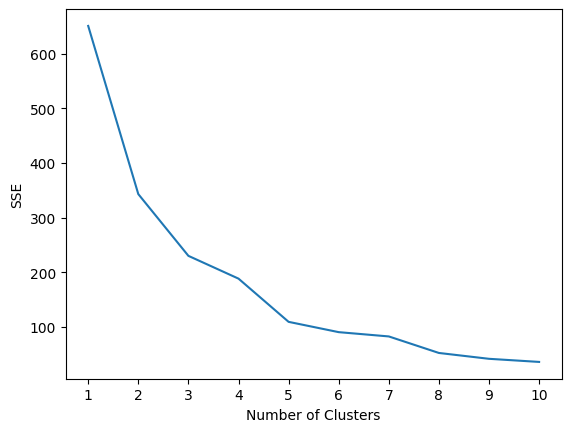

In [ ]:
#initialize kmeans parameters
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"random_state": 1,
}

#create list to hold SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_df)
    sse.append(kmeans.inertia_)

#visualize results
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [ ]:
kmeans = KMeans(init="random", n_clusters=4, n_init=10, random_state=1)

#fit k-means algorithm to data
kmeans.fit(scaled_df)

df['cluster_kmeans'] = kmeans.labels_

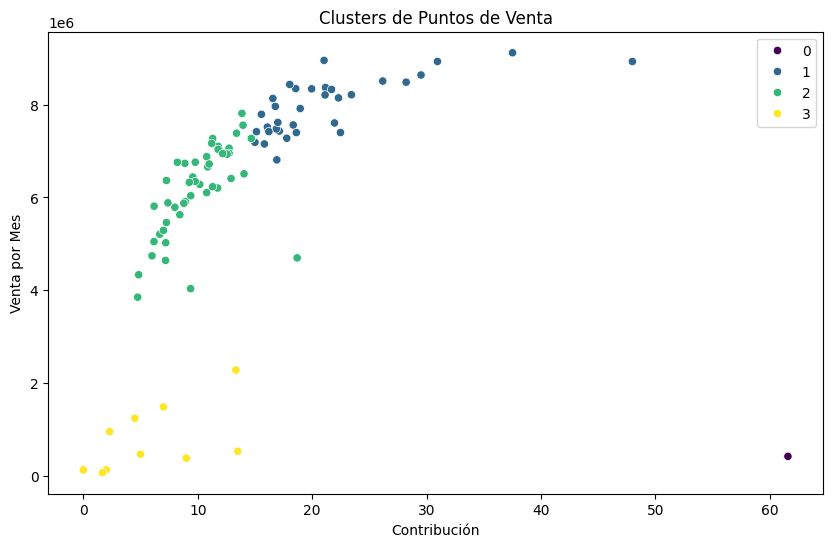

In [ ]:
# Visualización de los clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(y = 'CONTRIBUCION',
                 x='VENTA_POR_MES',
                 hue='cluster_kmeans', data=df, palette='viridis')
plt.title('Clusters de Puntos de Venta')
plt.xlabel('Contribución')
plt.ylabel('Venta por Mes')
plt.legend()
plt.show()

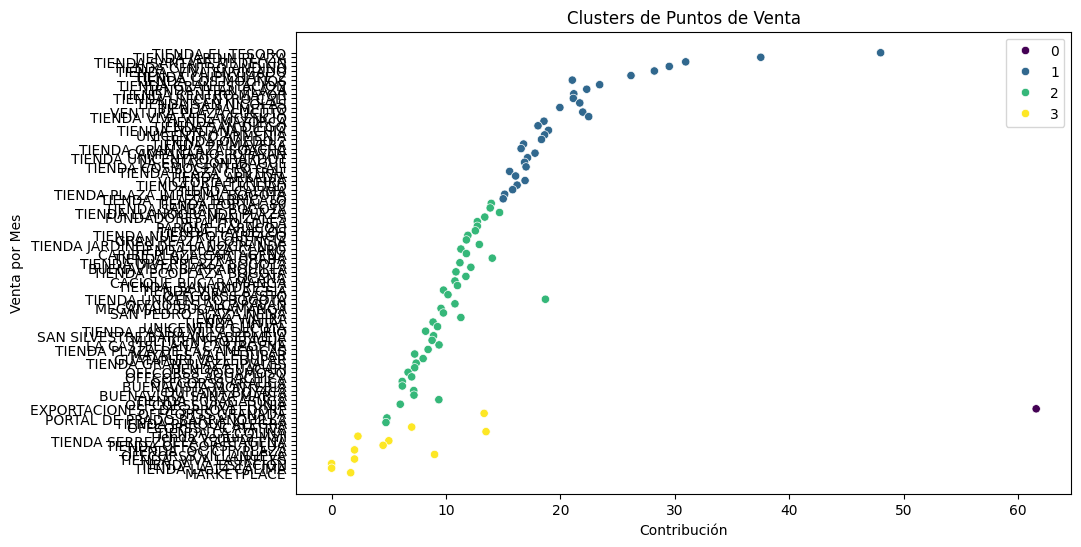

In [ ]:
# Visualización de los clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(y = df.index,
                 x='VENTA_POR_MES',
                 hue='cluster_kmeans', data=df, palette='viridis')
plt.title('Clusters de Puntos de Venta')
plt.xlabel('Contribución')
plt.ylabel('Venta por Mes')
plt.legend()
plt.show()

In [ ]:
import plotly.express as px

fig = px.scatter(df, x= df.index,
                 y='VENTA_POR_MES', 
                color='cluster_kmeans',
                    )

fig.show()

In [ ]:
df[df['cluster_kmeans'] == 2]

,CONTRIBUCION,ROTACION,VENTA_POR_MES,MARGEN,VENTA_PESOS,VENTA_UNDS,COSTO,cluster_kmeans
PUNTO_VENTA,,,,,,,,
TIENDA PORTAL 80,7556531.0,0.639442,13.956520,0.682256,11075798.0,321,3.519268e+06,2
TIENDA SANTAFÉ BOGOTÁ,7812028.0,0.603960,13.863640,0.675204,11569874.0,305,3.757846e+06,2
TIENDA LLANOGRANDE PLAZA,7272163.0,0.634578,14.681820,0.674279,10785092.0,323,3.512930e+06,2
FUNDADORES MANIZALES,7384507.0,0.647059,13.391300,0.682567,10818723.0,308,3.434216e+06,2
PITALITO HUILA,7061022.0,0.624733,12.739130,0.678705,10403664.0,293,3.342642e+06,2
PARQUE CARACOLI,6951754.0,0.594320,12.739130,0.686499,10126387.0,293,3.174632e+06,2
TIENDA HAYUELOS,6932348.0,0.597107,12.565220,0.675174,10267504.0,289,3.335156e+06,2
TIENDA NUESTRO CARTAGO,7019851.0,0.607539,11.913040,0.672468,10438941.0,274,3.419090e+06,2
GRAN PLAZA FLORENCIA,7102081.0,0.592998,11.782610,0.678380,10469176.0,271,3.367095e+06,2


### KMEANS BALANCEADO
Se dice balanceado porque se determina un minimo y máximo de clusters por definir

In [ ]:
from k_means_constrained import KMeansConstrained

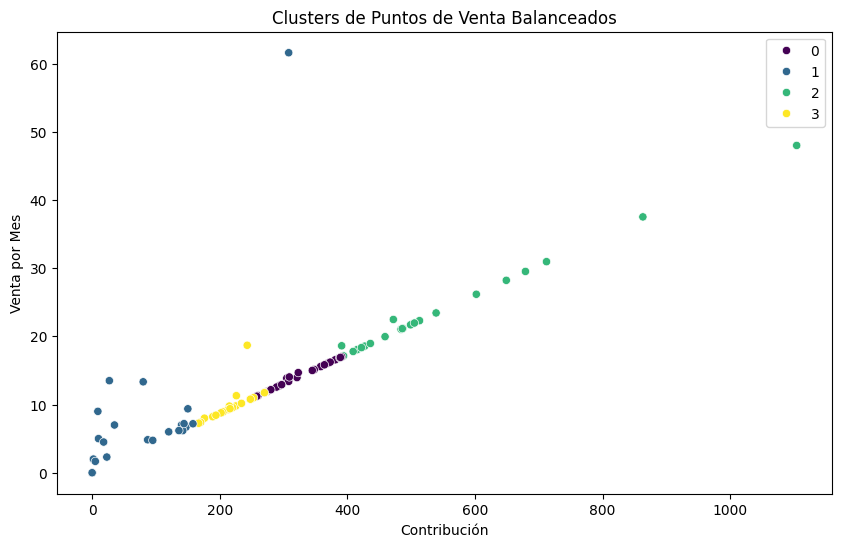

In [ ]:
features = ['CONTRIBUCION', 'ROTACION', 'VENTA_POR_MES', 'MARGEN', 'VENTA_PESOS', 'VENTA_UNDS']

x = df[features]
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Número de clusters y tamaño mínimo y máximo de cada cluster
n_clusters = 4
min_size = len(df) // n_clusters
max_size = len(df) // n_clusters + (len(df) % n_clusters > 0)

# Aplicar KMeans balanceado para crear 4 clusters
kmeans_constrained = KMeansConstrained(
    n_clusters=n_clusters,
    size_min=min_size,
    size_max=max_size,
    random_state=42
)

df['Cluster_kmeans_contrained'] = kmeans_constrained.fit_predict(x_scaled)

# # Visualización de los clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='VENTA_UNDS', y='VENTA_POR_MES', hue='Cluster_kmeans_contrained', data=df, palette='viridis')
plt.title('Clusters de Puntos de Venta Balanceados')
plt.xlabel('Contribución')
plt.ylabel('Venta por Mes')
plt.legend()
plt.show()

# # Identificación de los mejores y peores clusters
# df['Score_kmeans_constrained'] = df['CONTRIBUCION'] + df['ROTACION'] + df['VENTA_POR_MES'] + df['MARGEN'] + df['VENTA_PESOS'] + df['VENTA_UNDS']
# # df['Score'] =  df['VENTA_UNDS']

# cluster_scores = df.groupby('Cluster')['Score'].mean().sort_values(ascending=False)
# print(cluster_scores)

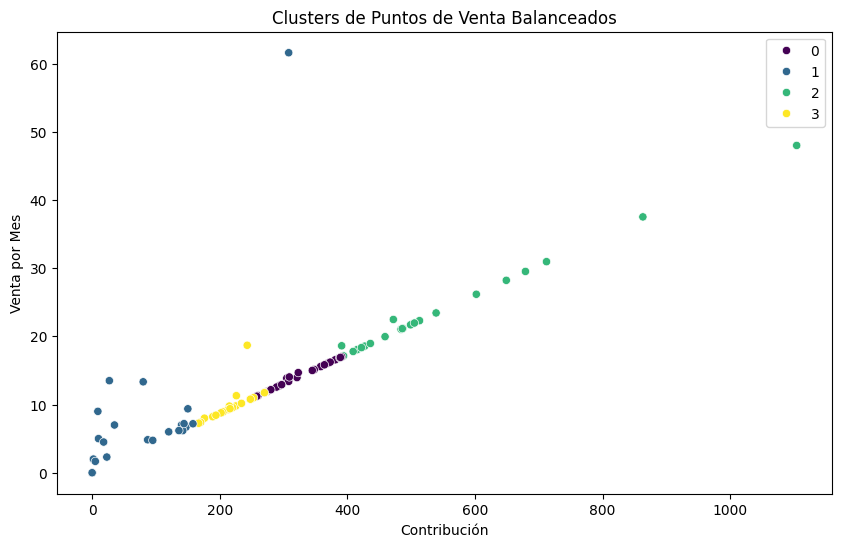

In [ ]:
# # Visualización de los clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='VENTA_UNDS', y='VENTA_POR_MES', hue='Cluster_kmeans_contrained', data=df, palette='viridis')
plt.title('Clusters de Puntos de Venta Balanceados')
plt.xlabel('Contribución')
plt.ylabel('Venta por Mes')
plt.legend()
plt.show()

### MODELOS AGLOMERACIÓN, DBSCAN, HDBSCAN

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, DBSCAN
import hdbscan

In [ ]:
# Paso 1: Preprocesar los datos
def preprocesar_datos(datos):
    # Eliminar filas con valores nulos
    datos = datos.dropna()
    
    # Seleccionar las columnas relevantes para el clustering
    # Suponiendo que todas las columnas excepto la primera (ID o nombre) son relevantes
    datos_relevantes = datos.iloc[:, 1:]
    
    # Escalar los datos para que se encuentren en el mismo rango de 0 a 1 
    scaler = StandardScaler()
    datos_escalados = scaler.fit_transform(datos_relevantes)
    
    return datos_escalados

In [ ]:
# Paso 2: Aplicar técnicas de clustering
def aplicar_clustering(datos_escalados):
    
    # Clustering aglomerativo
    agglomerative_clustering = AgglomerativeClustering(n_clusters=4, linkage='ward')
    clusters_aglomerativos = agglomerative_clustering.fit_predict(datos_escalados)
    
    # DBSCAN
    dbscan = DBSCAN(eps=0.5, min_samples=5) # eps distance between 2 points
    clusters_dbscan = dbscan.fit_predict(datos_escalados)
    
    # HDBSCAN
    hdbscan_clustering = hdbscan.HDBSCAN(min_cluster_size=10, min_samples=2)
    clusters_hdbscan = hdbscan_clustering.fit_predict(datos_escalados)
    
    return clusters_aglomerativos, clusters_dbscan, clusters_hdbscan


In [ ]:
# Paso 4: Guardar los resultados en un archivo CSV
def guardar_resultados(datos_originales, clusters_aglomerativos, clusters_dbscan, clusters_hdbscan):
    
    datos_originales['Cluster_Aglomerativo'] = clusters_aglomerativos
    datos_originales['Cluster_DBSCAN'] = clusters_dbscan
    datos_originales['Cluster_HDBSCAN'] = clusters_hdbscan
    
    # datos_originales.to_csv(archivo_salida, index=False)
    return datos_originales

In [ ]:
datos_escalados = preprocesar_datos(df)

clusters_aglomerativos, clusters_dbscan, clusters_hdbscan = aplicar_clustering(datos_escalados)

resultado_modelos_jerarquicos = guardar_resultados(df, clusters_aglomerativos, clusters_dbscan, clusters_hdbscan)


In [ ]:
resultado_modelos_jerarquicos

,CONTRIBUCION,ROTACION,VENTA_POR_MES,MARGEN,VENTA_PESOS,VENTA_UNDS,COSTO,cluster_kmeans,Cluster_kmeans_contrained,Cluster_Aglomerativo,Cluster_DBSCAN,Cluster_HDBSCAN
PUNTO_VENTA,,,,,,,,,,,,
TIENDA EL TESORO,8928663.00,0.883907,48.000000,0.669098,13344319.0,1104,4.415656e+06,1,2,0,-1,-1
TIENDA JARDIN PLAZA,9116961.00,0.840312,37.521740,0.671537,13576252.0,863,4.459291e+06,1,2,0,-1,1
TIENDA SANTAFÉ MEDELLIN,8929197.00,0.814645,30.956520,0.674060,13246882.0,712,4.317685e+06,1,2,0,-1,1
TIENDA CENTRO ANDINO,8637260.00,0.794152,29.521740,0.677368,12751202.0,679,4.113941e+06,1,2,0,-1,1
TIENDA VIVA ENVIGADO,8483378.00,0.784764,28.217390,0.674638,12574714.0,649,4.091336e+06,1,2,0,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
OFFCORSS VILLANUEVA,388322.30,0.187500,9.000000,0.658342,589848.7,9,2.015265e+05,3,1,3,-1,-1
TIENDA VIVA LAURELES,134151.30,0.285714,2.000000,0.665222,201663.9,2,6.751254e+04,3,1,3,-1,-1
TIENDA LA ESTACION,134151.30,0.000000,0.000000,0.665222,201663.9,0,6.751254e+04,3,1,3,-1,-1


In [ ]:
print(resultado_modelos_jerarquicos.cluster_kmeans.value_counts(), '\n')
print(resultado_modelos_jerarquicos.Cluster_Aglomerativo.value_counts(), '\n')
print(resultado_modelos_jerarquicos.Cluster_DBSCAN.value_counts(), '\n')
print(resultado_modelos_jerarquicos.Cluster_HDBSCAN.value_counts(), '\n')

cluster_kmeans
2    47
1    33
3    12
0     1
Name: count, dtype: int64 

Cluster_Aglomerativo
0    47
2    33
3    10
1     3
Name: count, dtype: int64 

Cluster_DBSCAN
-1    24
 3    22
 0    17
 2    14
 1    10
 4     6
Name: count, dtype: int64 

Cluster_HDBSCAN
 0    23
 1    22
-1    14
 4    14
 3    10
 2    10
Name: count, dtype: int64 



### Gráfica de los modelos

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [ ]:
fig = make_subplots(rows=2, cols=2,
                    subplot_titles=("Cluster Aglomerativo", "Cluster KMeans", "Cluster DBSCAN", "Cluster HDBSCAN"))


fig.add_trace(go.Scatter(x=resultado_modelos_jerarquicos['VENTA_UNDS'],
                         y=resultado_modelos_jerarquicos['VENTA_POR_MES'],
                         mode='markers',
                         marker= dict(
                                color=resultado_modelos_jerarquicos['Cluster_Aglomerativo']
                            ),
                         ), 
                         row=1, col=1,
                         )

fig.add_trace(go.Scatter(x=resultado_modelos_jerarquicos['VENTA_UNDS'],
                         y=resultado_modelos_jerarquicos['VENTA_POR_MES'],
                         mode='markers',
                         marker= dict(
                                color=resultado_modelos_jerarquicos['cluster_kmeans']
                            ),
                         ), 
                         row=1, col=2,
                         )


fig.add_trace(go.Scatter(x=resultado_modelos_jerarquicos['VENTA_UNDS'],
                         y=resultado_modelos_jerarquicos['VENTA_POR_MES'],
                         mode='markers',
                         marker= dict(
                                color=resultado_modelos_jerarquicos['Cluster_DBSCAN']
                            ),
                         ), 
                         row=2, col=1,
                         )


fig.add_trace(go.Scatter(x=resultado_modelos_jerarquicos['VENTA_UNDS'],
                         y=resultado_modelos_jerarquicos['VENTA_POR_MES'],
                         mode='markers',
                         marker= dict(
                                color=resultado_modelos_jerarquicos['Cluster_HDBSCAN']
                            ),
                         ), 
                         row=2, col=2,
                         )

FailSafeException: PyAutoGUI fail-safe triggered from mouse moving to a corner of the screen. To disable this fail-safe, set pyautogui.FAILSAFE to False. DISABLING FAIL-SAFE IS NOT RECOMMENDED.